### Load the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load the datasets
# load the transaction data and named it as 'trans_df'
trans_df = pd.read_excel('C:/Users/PMLS/Desktop/Quantium/transaction_data.xlsx')

#load the purchase behavior dataset and named it as 'pur_df'
pur_df = pd.read_csv('C:/Users/PMLS/Desktop/Quantium/purchase_behaviour.csv')

In [4]:
# take a look at the dataset trans_df
print('Transaction Dataset:')
display(trans_df.head())
print('Purchase Behavior Dataset')
display(pur_df.head())

Transaction Dataset:


,Date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,product_name,packet_size,prod_qty,total_sales,Year,month_num,month_name,weekday,weekday_num,quarter
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,2,6.0,2018,10,October,Wednesday,4,4
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,3,6.3,2019,5,May,Tuesday,3,2
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,2,2.9,2019,5,May,Monday,2,2
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,5,15.0,2018,8,August,Friday,6,3
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,3,13.8,2018,8,August,Saturday,7,3


Purchase Behavior Dataset


,LYLTY_CARD_NBR,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
# make copies of datsets in case if we lose them
df1 = trans_df.copy()
df2 = pur_df.copy()

Here each feature in dataset `trans_df` is defined as:
- **Date:** The date on which the product was purchased.
- **STORE_NBR:** The Store Number, identifier for retail store location
- **LYLTY_CARD_NBR:** Loyalty Card Number, identifier for customer's loyalty
- **TXN_ID:** Transaction ID
- **PROD_NBR:** Product Number
- **product_name:** Name of the product
- **packet_size:** The size of one packet (in grams)
- **prod_qty:** Quantities of the product that are purchased
- **tot_sales:** Total Sales
- **month_num**: Month Number
- **weekday_num**: weekday Number
- **quarter:** Quarter of the year (1,2,3,or 4)

___

Here each feature in dataset `pur_df` is defined as:
- **lifestage:** Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.
- **premium_customer:** Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

### Exploratory Data Analysis:

In [9]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   product_name    264836 non-null  object        
 6   packet_size     264836 non-null  int64         
 7   prod_qty        264836 non-null  int64         
 8   total_sales     264836 non-null  float64       
 9   Year            264836 non-null  int64         
 10  month_num       264836 non-null  int64         
 11  month_name      264836 non-null  object        
 12  weekday         264836 non-null  object        
 13  weekday_num     264836 non-null  int64         
 14  quarter         264836 non-null  int

We can see that there are 15 features in our `trans_df` and there are no null values in our dataset and datatype of each feature is also set.

In [11]:
# Remove numbers followed by 'g' (like 220g, 100g) in product_name feature
trans_df['product_name'] = trans_df['product_name'].str.replace(r'\s*\d+\s*[gG]', '', regex=True)

In [12]:
trans_df['product_name'].describe()

count                              264836
unique                                114
top       Kettle Mozzarella Basil & Pesto
freq                                 3304
Name: product_name, dtype: object

Since there are 114 categories of the products and we are only interested in the chips like products to understand the customer behavior so we will keep only those rows with chips-like category

In [14]:
# keep the only rows with chips in product_name feature
trans_df = trans_df[trans_df['product_name'].str.contains('Chips', case=False, na=False)]

In [15]:
trans_df.head()

,Date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,product_name,packet_size,prod_qty,total_sales,Year,month_num,month_name,weekday,weekday_num,quarter
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9,2019,5,May,Monday,2,2
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,330,1,5.7,2019,5,May,Thursday,5,2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar,330,1,5.7,2019,5,May,Friday,6,2
14,2019-05-15,19,19272,16686,44,Thins Chips Light& Tangy,175,1,3.3,2019,5,May,Wednesday,4,2
33,2019-05-18,45,45220,41651,22,Thins Chips Originl saltd,175,1,3.3,2019,5,May,Saturday,7,2


In [16]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49770 entries, 2 to 264830
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            49770 non-null  datetime64[ns]
 1   STORE_NBR       49770 non-null  int64         
 2   LYLTY_CARD_NBR  49770 non-null  int64         
 3   TXN_ID          49770 non-null  int64         
 4   PROD_NBR        49770 non-null  int64         
 5   product_name    49770 non-null  object        
 6   packet_size     49770 non-null  int64         
 7   prod_qty        49770 non-null  int64         
 8   total_sales     49770 non-null  float64       
 9   Year            49770 non-null  int64         
 10  month_num       49770 non-null  int64         
 11  month_name      49770 non-null  object        
 12  weekday         49770 non-null  object        
 13  weekday_num     49770 non-null  int64         
 14  quarter         49770 non-null  int64         
dtypes: dat

Now there are 49,770 rows in our dataset and there are no null values in our dataset which is good thing

In [18]:
trans_df.drop(columns = ['Date', 'PROD_NBR', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'Year', 'month_num', 'weekday_num', 'quarter']).describe()

,packet_size,prod_qty,total_sales
count,49770.000000,49770.000000,49770.000000
mean,171.362769,1.906249,6.750197
std,49.110207,0.340037,2.155060
min,110.000000,1.000000,1.900000
25%,160.000000,2.000000,5.800000
50%,170.000000,2.000000,6.600000
75%,175.000000,2.000000,7.600000
max,330.000000,5.000000,28.500000


<Axes: ylabel='total_sales'>

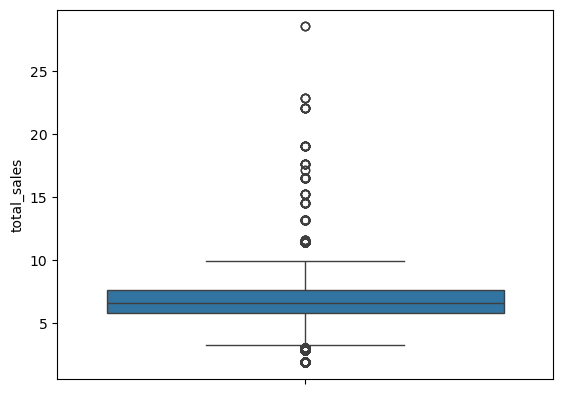

In [19]:
sns.boxplot(trans_df['total_sales'])

There are so many outliers as we can see from the above boxplot, we will replace these outliers with extreme values

In [21]:
q1 = trans_df['total_sales'].quantile(0.25)
q3 = trans_df['total_sales'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

In [22]:
outlier_mask = (trans_df['total_sales'] < lower_bound) | (trans_df['total_sales'] > upper_bound)
outlier_mask.value_counts()

total_sales
False    45073
True      4697
Name: count, dtype: int64

There are 4,697 outliers in `total_sales` feature.

In [24]:
outliers = trans_df[outlier_mask]

In [25]:
# Replace outliers with upper bound value
trans_df['total_sales'] = trans_df['total_sales'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

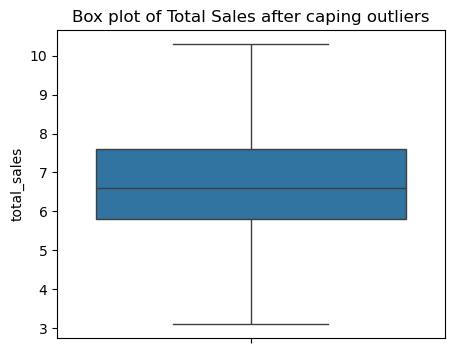

In [26]:
plt.figure(figsize=(5,4))
sns.boxplot(trans_df['total_sales'])
plt.title('Box plot of Total Sales after caping outliers')
plt.show()

In [27]:
trans_df['product_name'].describe()

count                                   49770
unique                                     21
top       Cobs Popd Swt/Chlli &Sr/Cream Chips
freq                                     3269
Name: product_name, dtype: object

So it says that in our dataframe we have 21 chips-like categories and out of which the category 'Cobs Popd Swt/Chlli &Sr/Cream Chips' is repeated the most which means that this product is purchased the most among other products, and the transaction on this product was made 3,269 times

In [29]:
# total sales by categories
total_sales_by_categories = trans_df.groupby('product_name')['total_sales'].sum().reset_index()
total_sales_by_categories.sort_values(by = 'total_sales', ascending= False, inplace = True)
total_sales_by_categories

,product_name,total_sales
7,Smiths Crinkle Chips Salt & Vinegar,31507.7
3,Doritos Corn Chips Cheese Supreme,27063.5
4,Doritos Corn Chips Nacho Cheese,26492.7
5,Doritos Corn Chips Original,26162.8
0,Cobs Popd Sea Salt Chips,23798.7
2,Cobs Popd Swt/Chlli &Sr/Cream Chips,23710.2
1,Cobs Popd Sour Crm &Chives Chips,22870.9
16,Thins Potato Chips Hot & Spicy,20367.9
12,Thins Chips Light& Tangy,20053.1
15,Thins Chips Seasonedchicken,19692.6


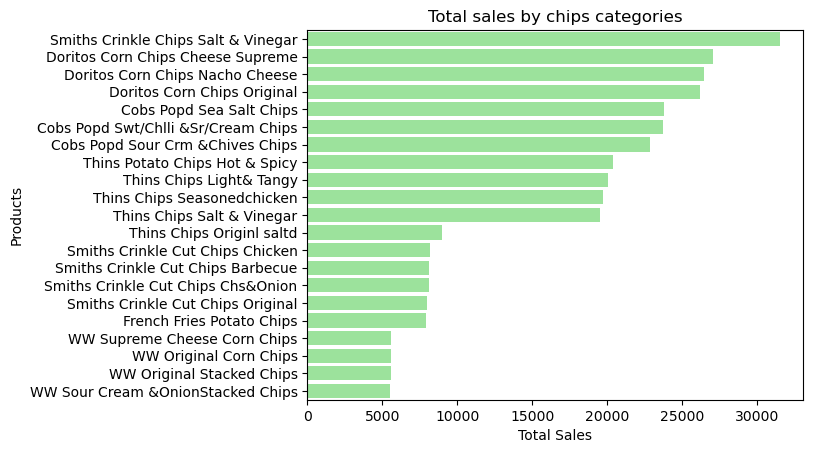

In [30]:
sns.barplot(x = 'total_sales', y = 'product_name', data = total_sales_by_categories, color = 'lightgreen')
plt.title('Total sales by chips categories')
plt.xlabel('Total Sales')
plt.ylabel('Products')
plt.show()          

From the above plot and the dataframe we can say that the products `Smiths Crinkle Chips Salt & Vinegar`, `Doritos Corn Chips Cheese Supreme`, and `Doritos Corn Chips Nacho Cheese` are the top most 3 products that generated a large revenue among all categories,aro these 3 categories made a total revenue of **31,507**,  **27,063** , and **26,493**, respectively over the past 2 years 2018 and 2019

In [33]:
pur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   lifestage         72637 non-null  object
 2   premium_customer  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [34]:
pur_df.describe(include = 'all')

,LYLTY_CARD_NBR,lifestage,premium_customer
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


`pur_df` overall  looks good and does not need any type of cleaning on this dataset